In [1]:
# load data
import pandas as pd
data = pd.read_csv('Fish.csv')
df = data.copy()

# dispaly ten randomly selected samples
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
120,Perch,900.0,37.0,40.0,42.5,11.7300,7.2250
50,Roach,200.0,22.1,23.5,26.8,7.3968,4.1272
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
109,Perch,514.0,30.5,32.8,34.0,10.0300,6.0180
30,Bream,920.0,35.0,38.5,44.1,18.0369,6.3063
131,Pike,300.0,34.8,37.3,39.8,6.2884,4.0198
31,Bream,955.0,35.0,38.5,44.0,18.0840,6.2920
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
135,Pike,510.0,40.0,42.5,45.5,6.8250,4.4590
27,Bream,714.0,32.7,36.0,41.5,16.5170,5.8515


In [2]:
# view data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [3]:
# check for missing values
print('Is there any NaN in the dataset: {}'.format(df.isnull().values.any()))

Is there any NaN in the dataset: False


In [4]:
# calculate the correlation matrix
df.corr(numeric_only=True)

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<Axes: >

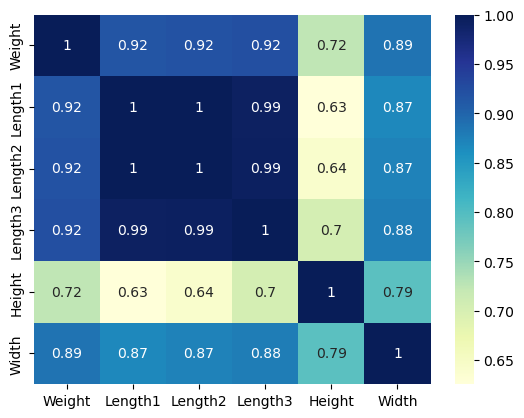

In [7]:
# visualize the correlation matrix
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')

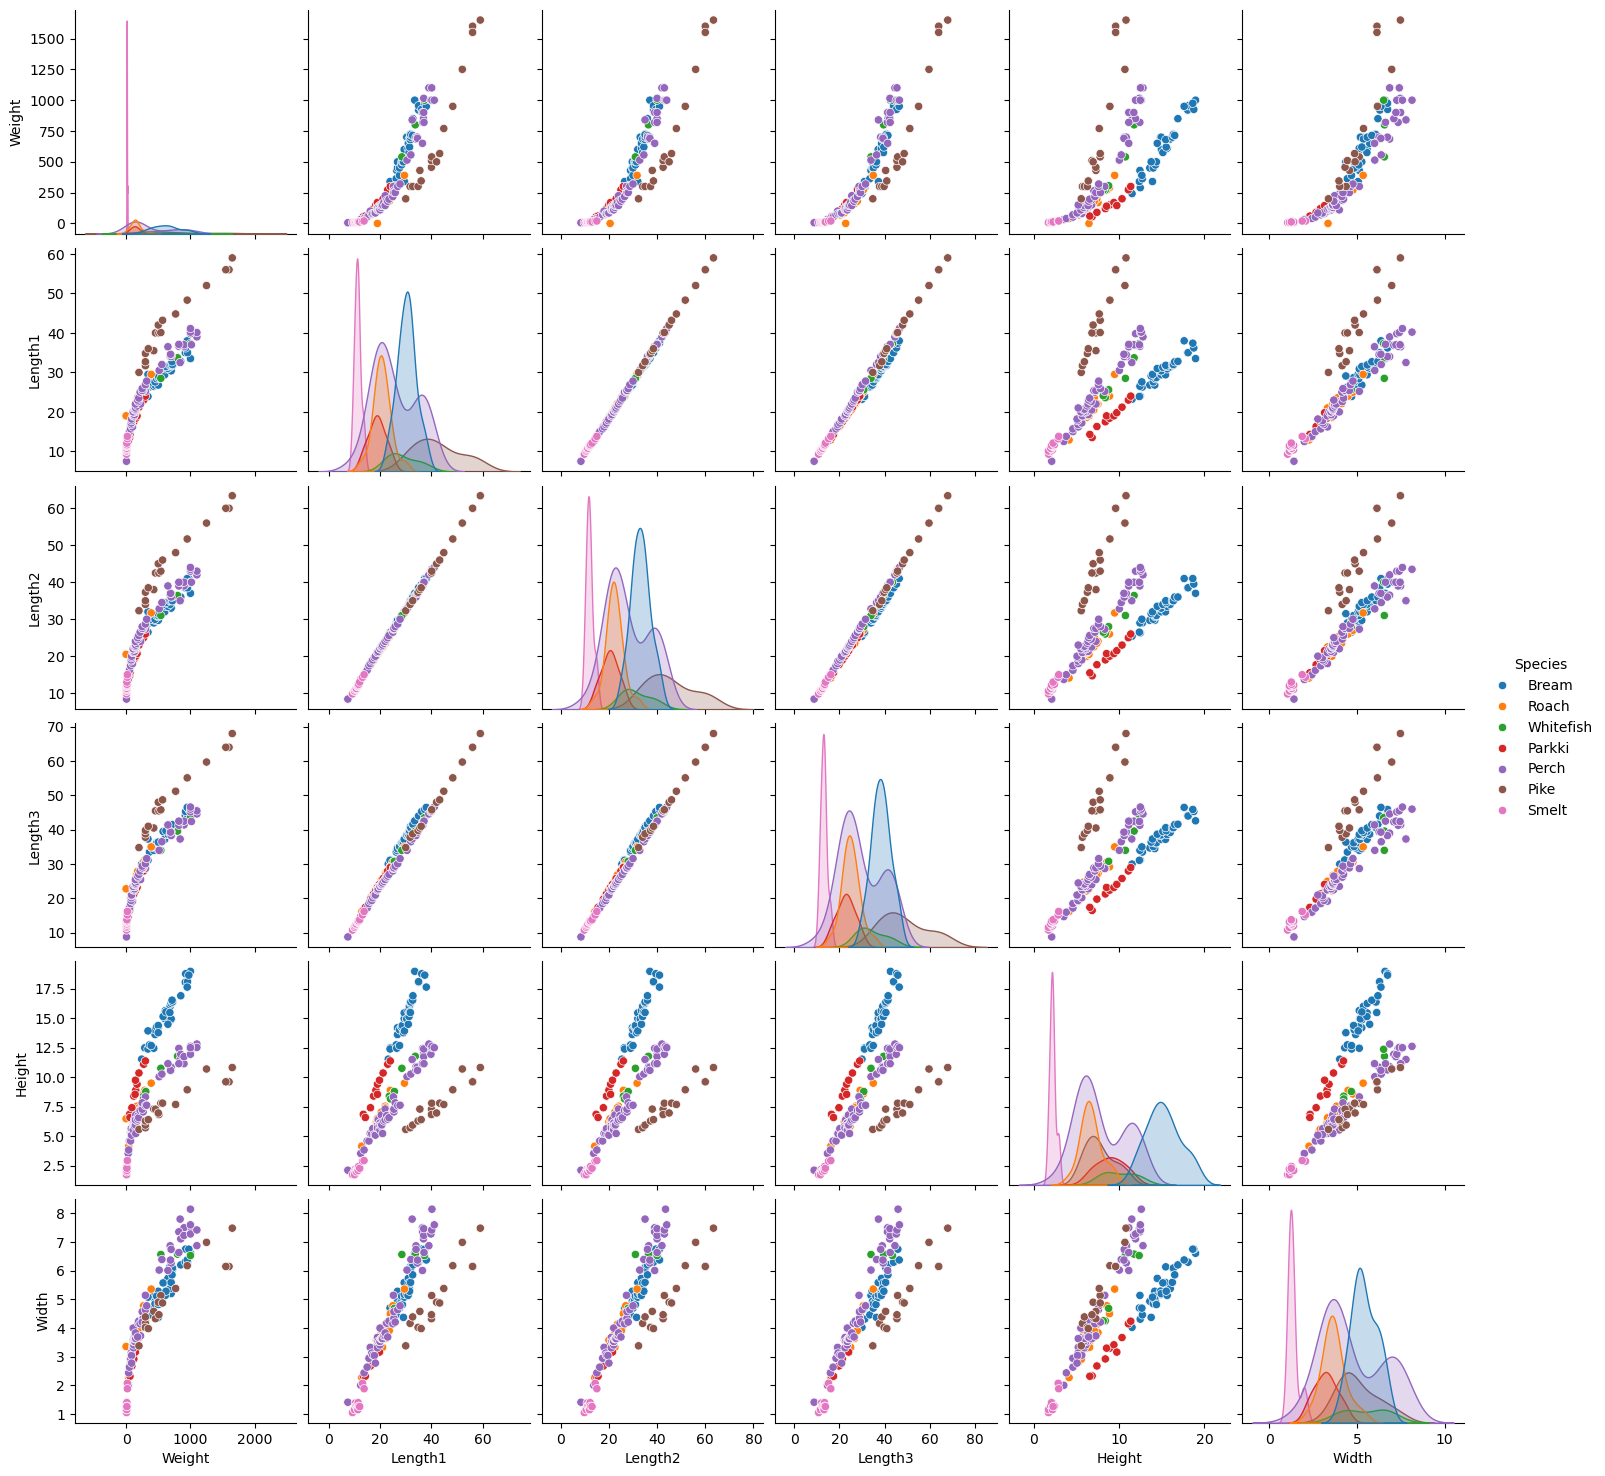

In [8]:
# correlation plot
sns.pairplot(df, kind='scatter', hue='Species')

In [9]:
# describe numerical data, where .T is used to transpose the output
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [10]:
# target: Weight of the fish
# features: all other numerical columns (Length1, Length2, Length3, Height, Width)
y = df['Weight']
X = df.iloc[:, 2:]

In [11]:
# split the dataset into training and testing sets, then display their shapes
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('X_train: {}'.format(np.shape(X_train)))
print('y_train: {}'.format(np.shape(y_train)))
print('X_test: {}'.format(np.shape(X_test)))
print('y_test: {}'.format(np.shape(y_test)))

X_train: (127, 5)
y_train: (127,)
X_test: (32, 5)
y_test: (32,)


In [10]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [11]:
# display the model's intercept and coefficients
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -484.8536494736824
Model coefficients:  [ 56.90591757  -4.63465655 -28.54481968  24.25584123  43.68347751]


In [12]:
# output the regression equation
print('y = {} + {} * X1 + {} * X2 + {} * X3 + {} * X4 + {} * X5'.format(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4]))

y = -484.8536494736824 + 56.905917569393495 * X1 + -4.634656548025463 * X2 + -28.544819680287617 * X3 + 24.2558412265498 * X4 + 43.683477508009915 * X5


In [ ]:
# evaluate the model
from sklearn.metrics import r2_score

r2_score(y_train, reg.predict(X_train))

0.8861940780217027

In [ ]:
# k-fold cross-validation
from sklearn.model_selection import cross_val_score
print(cross_val_score(reg, X_train, y_train, cv=10, scoring='r2'))
cross_val_score(reg, X_train, y_train, cv=10, scoring='r2').mean()

[0.78097703 0.86340773 0.90313506 0.94893488 0.93842745 0.85176837
 0.91632035 0.85490536 0.8073436  0.81653965]


0.8681759500582432

In [ ]:
# predict the test set and calculate the R^2 score
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.8704220588719106